I've processed the HDB resale dataset through several key steps to prepare it for analysis:

**Loaded the Dataset**: Imported the resale flat prices data to understand its structure.

**Checked for Missing Value**: Ensured there were no missing values across all columns.

**Converted 'month' to Datetime**: Transformed the 'month' column to datetime format for easier time-based analysis.

**Calculated Flat Age at Sale**: Introduced a new column 'flat_age_at_sale' by subtracting the 'lease_commence_date' from the sale year, providing insights into the effect of flat age on resale price.

**Visual Inspection for Outliers**: Used histograms and boxplots to visually inspect 'floor_area_sqm' and 'resale_price' for outliers, identifying potential anomalies.

**Detected Outliers with IQR**: Applied the Interquartile Range method to 'floor_area_sqm' and 'resale_price' to statistically identify outliers, which were kept as they fall within reasonable ranges for the market.

**Calculated Price Per Square Meter**: Created a new column 'price_per_sqm' to standardize price comparisons, rounding to two decimal places.

**Exported Cleaned Data**: Saved the enhanced dataset to 'resale_data_cleaned.csv' for shared access and further analysis.



In [2]:
# First, let's load the dataset to understand its structure and identify the cleaning tasks
import pandas as pd

# Load the dataset
file_path = './Original_data/ResaleFlatPricesBasedonApprovalDate19901999.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200


In [4]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display the number of missing values in each column
print(missing_values)

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64


In [6]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'month' is the column you want to convert
df['month'] = pd.to_datetime(df['month'])

In [8]:
# Calculating the age of the flat at the time of sale
# The age of the flat can be calculated by subtracting the 'lease_commence_date' from the year of the 'month' (sale date)

df['sale_year'] = df['month'].dt.year
df['flat_age_at_sale'] = df['sale_year'] - df['lease_commence_date']

# Dropping the 'sale_year' column as it was only used for calculation
df.drop('sale_year', axis=1, inplace=True)

# Display the first few rows to confirm the addition of 'flat_age_at_sale'
df[['month', 'town', 'flat_type', 'lease_commence_date', 'flat_age_at_sale', 'resale_price']].head()

,month,town,flat_type,lease_commence_date,flat_age_at_sale,resale_price
0,1990-01-01,ANG MO KIO,1 ROOM,1977,13,9000
1,1990-01-01,ANG MO KIO,1 ROOM,1977,13,6000
2,1990-01-01,ANG MO KIO,1 ROOM,1977,13,8000
3,1990-01-01,ANG MO KIO,1 ROOM,1977,13,6000
4,1990-01-01,ANG MO KIO,3 ROOM,1976,14,47200


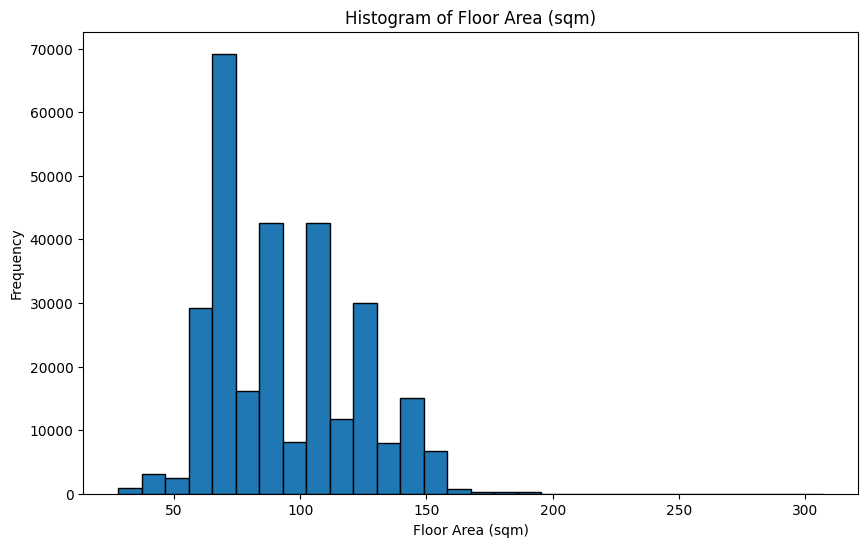

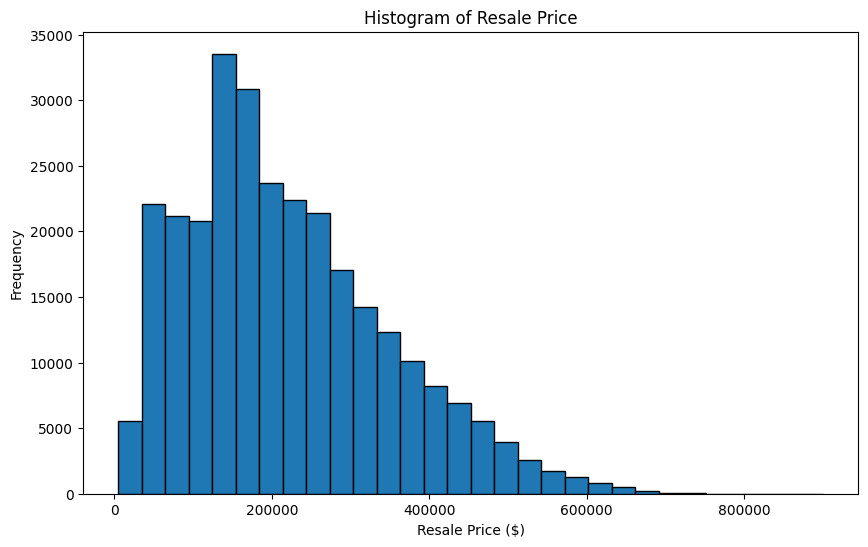

In [9]:
import matplotlib.pyplot as plt

# Plot histogram for 'floor_area_sqm'
plt.figure(figsize=(10, 6))
plt.hist(df['floor_area_sqm'], bins=30, edgecolor='k')
plt.title('Histogram of Floor Area (sqm)')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for 'resale_price'
plt.figure(figsize=(10, 6))
plt.hist(df['resale_price'], bins=30, edgecolor='k')
plt.title('Histogram of Resale Price')
plt.xlabel('Resale Price ($)')
plt.ylabel('Frequency')
plt.show()


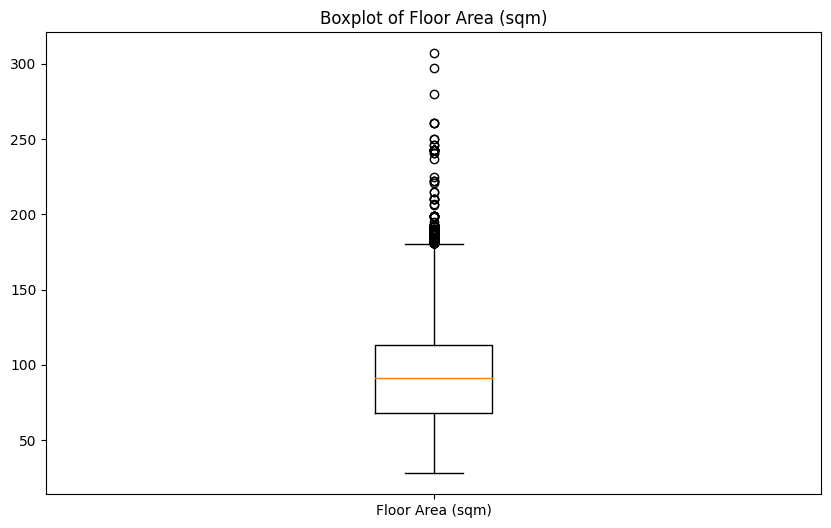

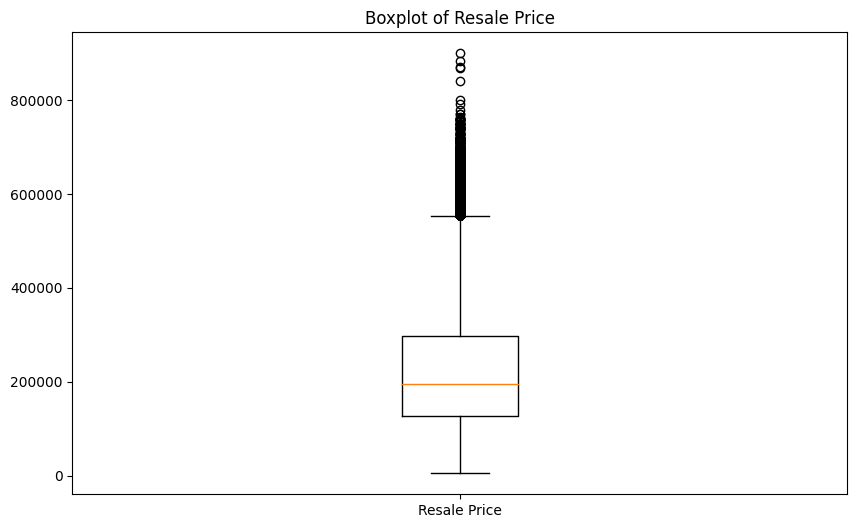

In [10]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['floor_area_sqm'])
plt.title('Boxplot of Floor Area (sqm)')
plt.xticks([1], ['Floor Area (sqm)'])
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot(df['resale_price'])
plt.title('Boxplot of Resale Price')
plt.xticks([1], ['Resale Price'])
plt.show()


In [11]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return data[(data < lower_bound) | (data > upper_bound)]

# Detect outliers in 'floor_area_sqm'
outliers_floor_area = detect_outliers_iqr(df['floor_area_sqm'])
print("Outliers in Floor Area (sqm):", outliers_floor_area)

# Detect outliers in 'resale_price'
outliers_resale_price = detect_outliers_iqr(df['resale_price'])
print("Outliers in Resale Price:", outliers_resale_price)

# Howerver even though these data looks like outlier to computer they still falls in a reasonable range in reality.

Outliers in Floor Area (sqm): 3203      206.0
11125     210.0
28257     198.0
29332     199.0
31519     261.0
          ...  
284871    243.0
286944    184.0
286955    192.0
286956    192.0
286964    189.0
Name: floor_area_sqm, Length: 312, dtype: float64
Outliers in Resale Price: 88311     586000
88312     570000
90081     570000
91755     570000
91952     565000
           ...  
286657    560000
286664    576000
286670    600000
286803    565000
286804    648000
Name: resale_price, Length: 3906, dtype: int64


In [15]:
# calculate price per square meter
df['price_per_sqm'] = df['resale_price']/df['floor_area_sqm']
# Round to 2 digits after the decimal point
df['price_per_sqm'] = df['price_per_sqm'].round(2)
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,flat_age_at_sale,price_per_sqm
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000,13,290.32
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000,13,193.55
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000,13,258.06
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000,13,193.55
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200,14,646.58


In [18]:
# Export the DataFrame to a CSV file
df.to_csv('./Cleaned_data/resale_data_cleaned.csv', index=False)